# Water Potability
https://www.kaggle.com/datasets/adityakadiwal/water-potability

# Liens utiles:

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html

https://fr.wikipedia.org/wiki/Coefficient_de_variation

https://kobia.fr/imbalanced-data-smote/

In [1]:
# Installation de imbalanced-learn pour le SMOTE
#pip install -U imbalanced-learn

# 1) Importation des bibliothèques

In [2]:
# Analyse 
import pandas as pd
import numpy as np

# Etude graphique
import matplotlib.pyplot as plt
import seaborn as sns

# Modélisation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Combinaison 
from itertools import combinations
import operator

# Valeurs manquantes
import missingno as msno

# Suppression des alertes
import warnings
warnings.filterwarnings("ignore")

# Oversampling
from imblearn.over_sampling import SMOTE

# 2) Importation du dataset

In [3]:
df = pd.read_csv('water_potability.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# 3) Description des données

In [4]:
# Informations sur le dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
# Description des données
df[df['Potability']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
ph,1101.0,7.073783,1.448048,0.227499,6.179312,7.036752,7.933068,13.175402
Hardness,1278.0,195.800744,35.547041,47.432000,174.330531,196.632907,218.003420,323.124000
Solids,1278.0,22383.991018,9101.010208,728.750830,15668.985035,21199.386614,27973.236446,56488.672413
Chloramines,1278.0,7.169338,1.702988,0.352000,6.094134,7.215163,8.199261,13.127000
Sulfate,985.0,332.566990,47.692818,129.000000,300.763772,331.838167,365.941346,481.030642
Conductivity,1278.0,425.383800,82.048446,201.619737,360.939023,420.712729,484.155911,695.369528
Organic_carbon,1278.0,14.160893,3.263907,2.200000,12.033897,14.162809,16.356245,23.604298
Trihalomethanes,1223.0,66.539684,16.327419,8.175876,56.014249,66.678214,77.380975,124.000000
Turbidity,1278.0,3.968328,0.780842,1.492207,3.430909,3.958576,4.509569,6.494249
Potability,1278.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


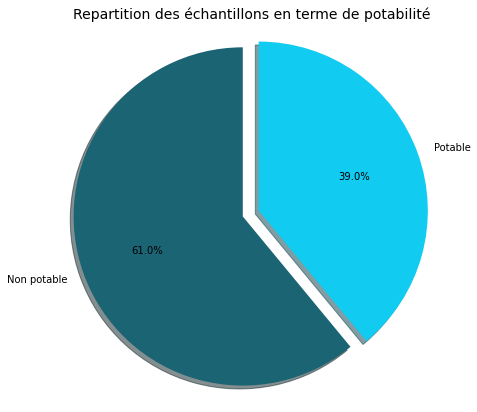

In [6]:
# Répartion des échantillons en terme de potabilité
potability_pie = df['Potability'].value_counts()
fig, ax = plt.subplots(figsize=(7, 7))
labels = 'Non potable', 'Potable'
colors = ['#1B6473', '#12CBF0']
explode = (0, 0.1)
ax.pie(potability_pie, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90, explode=explode)
ax.axis('equal')
plt.title('Repartition des échantillons en terme de potabilité', fontsize=14)
plt.show()

# 4) Valeurs manquantes

<AxesSubplot:>

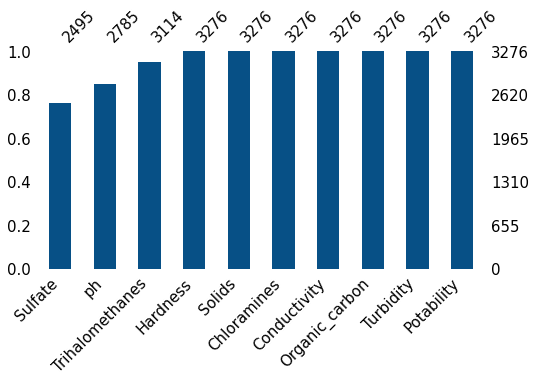

In [7]:
# Visualisation graphique des valeurs manquantes
msno.bar(df, color="#075086", sort="ascending", figsize=(8,4), fontsize=15)

In [8]:
# Proportion de valeurs manquantes
missing_data = ['ph', 'Sulfate', 'Trihalomethanes']
missing_data_percent = df[missing_data].isna().sum() / len(df) * 100
missing_data_percent.sort_values(ascending=False)

Sulfate            23.840049
ph                 14.987790
Trihalomethanes     4.945055
dtype: float64

In [9]:
# Calcul du coefficient de variation: cv = std / mean
cv = df[missing_data].std()/df[missing_data].mean()
cv

ph                 0.225161
Sulfate            0.124086
Trihalomethanes    0.243613
dtype: float64

In [10]:
# Remplacement des valeurs manquantes
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())
# Vérification 
df[missing_data].isna().sum()

ph                 0
Sulfate            0
Trihalomethanes    0
dtype: int64

# 5) Etude des corrélations entre les variables numériques expliquatives

In [11]:
# Tableau de valeurs de corrélation
num_corr = df.drop('Potability',axis=1).corr()
num_corr

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000


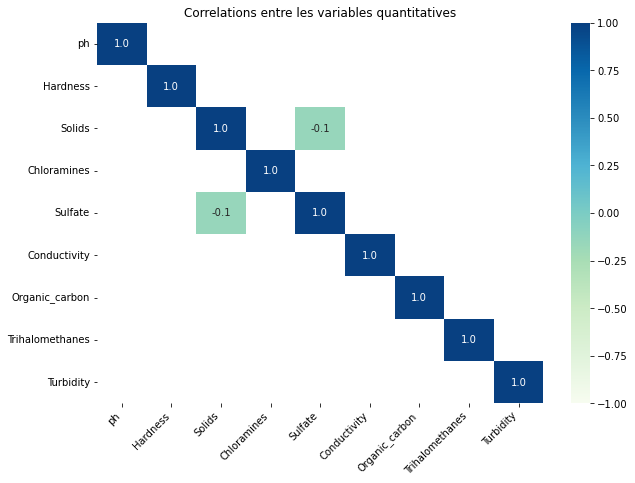

In [12]:
# Représentation graphiques des corrélations supérieurs à 0.1
num_corr = num_corr[abs(num_corr) >= 0.1]
plt.figure(figsize=(10, 7))
g = sns.heatmap(num_corr,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=-1,
            vmax=1)
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')
title = plt.title('Correlations entre les variables quantitatives')

# 6) Etude graphique

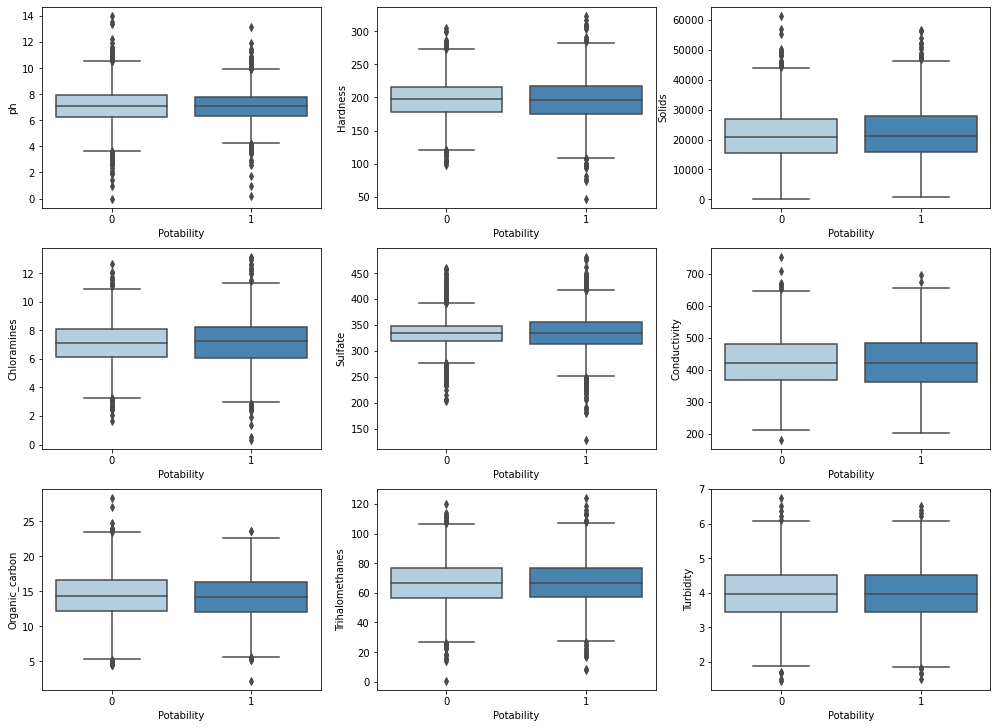

In [13]:
fig = plt.figure(figsize=(17,17))

x="Potability"
plt.subplot(431)
ax1 = sns.boxplot(x=x, y='ph', data=df, palette="Blues")
plt.subplot(432)
ax2 = sns.boxplot(x=x, y='Hardness', data=df, palette="Blues")
plt.subplot(433)
ax3 = sns.boxplot(x=x, y='Solids', data=df, palette="Blues")
plt.subplot(434)
ax4 = sns.boxplot(x=x, y='Chloramines', data=df, palette="Blues")
plt.subplot(435)
ax5 = sns.boxplot(x=x, y='Sulfate', data=df, palette="Blues")
plt.subplot(436)
ax6 = sns.boxplot(x=x, y='Conductivity', data=df, palette="Blues")
plt.subplot(437)
ax7 = sns.boxplot(x=x, y='Organic_carbon', data=df, palette="Blues")
plt.subplot(438)
ax8 = sns.boxplot(x=x, y='Trihalomethanes', data=df, palette="Blues")
plt.subplot(439)
ax9 = sns.boxplot(x=x, y='Turbidity', data=df, palette="Blues")
plt.show()

# 7) Normalisation et randomisation

In [14]:
# Normalisation
params=[c for c in df.columns if c!= 'Potability']
mean = df[params].mean()
et = df[params].std()
df_norm =(df[params] - mean) / et
df_norm['Potability'] = df['Potability'] 
df_norm

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.927437e-14,0.259155,-0.139450,0.112398,9.612107e-01,1.708693,-1.180470,1.305950e+00,-1.286101,0
1,-2.288990e+00,-2.036103,-0.385928,-0.307647,-3.302782e-14,2.062260,0.270556,-6.383825e-01,0.684113,0
2,6.927620e-01,0.847535,-0.240011,1.360386,-3.302782e-14,-0.094018,0.780998,1.509178e-03,-1.167187,0
3,8.408220e-01,0.547568,0.000493,0.591917,6.394214e-01,-0.778711,1.254943,2.152545e+00,0.848282,0
4,1.368360e+00,-0.464358,-0.460178,-0.363642,-6.540767e-01,-0.343886,-0.824231,-2.181266e+00,0.138764,0
...,...,...,...,...,...,...,...,...,...,...
3271,-1.641337e+00,-0.081745,2.915743,0.028023,7.241535e-01,1.239966,-0.118057,1.847838e-02,0.601032,1
3272,4.952948e-01,-0.085654,-0.534214,0.593200,-3.302782e-14,-0.417642,1.698301,3.604556e-15,-1.497398,1
3273,1.591011e+00,-0.626734,1.270616,0.143995,-3.302782e-14,0.072252,-0.981179,2.187149e-01,-0.855876,1
3274,-1.329313e+00,1.041196,-1.143883,-0.517294,-3.302782e-14,-0.288553,-0.941920,7.033610e-01,0.950652,1


In [15]:
# Randomisation
# np.random.seed(1)
# new_df_norm = np.random.permutation(df_norm.index)
# df_norm = df_norm.loc[new_df_norm]
# df_norm

# 8) Modélisation

# 8.1) Première approche

In [45]:
X = df_norm.drop('Potability',axis=1)
y = df_norm['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [51]:
models =[("Logistic regression", LogisticRegression()),('KNN',KNeighborsClassifier()),
             ("Decision tree", DecisionTreeClassifier()),('Random forest',RandomForestClassifier())]

cv_score_list = []
model_name_list = []

for name ,model in models:
    model.fit(X_train, y_train)
    cv_score_list.append(round(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean(), 2))
    model_name_list.append(name)
    
print(f'X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}, X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape} ')

df_result = pd.DataFrame(columns = ['model', 'cv score'])
df_result['model'] = model_name_list
df_result['cv score'] = cv_score_list
df_result.sort_values(by=['cv score'], ascending = False)

X_train Shape: (2620, 9), y_train Shape: (2620,), X_test Shape: (656, 9), y_test Shape: (656,) 


,model,cv score
3,Random forest,0.66
0,Logistic regression,0.61
1,KNN,0.61
2,Decision tree,0.57


# 8.2) SMOTE

In [52]:
samp = SMOTE()
X = df_norm.drop('Potability',axis=1)
y = df_norm['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
X_train, y_train =samp.fit_resample(X_train,y_train)

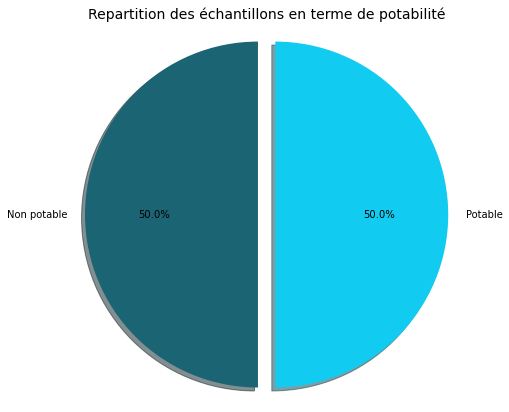

In [53]:
# Répartion des échantillons en terme de potabilité
potability_pie = y_train.value_counts()
fig, ax = plt.subplots(figsize=(7, 7))
labels = 'Non potable', 'Potable'
colors = ['#1B6473', '#12CBF0']
explode = (0, 0.1)
ax.pie(potability_pie, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90, explode=explode)
ax.axis('equal')
plt.title('Repartition des échantillons en terme de potabilité', fontsize=14)
plt.show()

In [54]:
models =[("Logistic regression", LogisticRegression()),('KNN',KNeighborsClassifier()),
             ("Decision tree", DecisionTreeClassifier()),('Random forest',RandomForestClassifier())]

cv_score_list = []
model_name_list = []

for name ,model in models:
    model.fit(X_train, y_train)
    cv_score_list.append(round(cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean(), 2))
    model_name_list.append(name)
    
print(f'X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}, X_test Shape: {X_test.shape}, y_test Shape: {y_test.shape} ')

df_result = pd.DataFrame(columns = ['model', 'cv score'])
df_result['model'] = model_name_list
df_result['cv score'] = cv_score_list
df_result.sort_values(by=['cv score'], ascending = False)

X_train Shape: (3198, 9), y_train Shape: (3198,), X_test Shape: (656, 9), y_test Shape: (656,) 


,model,cv score
3,Random forest,0.74
1,KNN,0.66
2,Decision tree,0.63
0,Logistic regression,0.49


# 8.3) Recherche des hyper-paramètres optimaux avec GridSearchCV

In [55]:
def hyper_params(param_grid, model):
    grid = GridSearchCV(model , param_grid, scoring = 'accuracy')
    grid.fit(X_train, y_train)
    model = grid.best_estimator_
    print(model)
    print(grid.best_score_)
    print(grid.best_params_)
    return model

In [25]:
# K les plus proches voisins

In [56]:
hyper_params({'n_neighbors': np.arange(1,50),
              'metric':['euclidean','manhattan']},
             KNeighborsClassifier())

KNeighborsClassifier(metric='euclidean', n_neighbors=1)
0.7398713810641627
{'metric': 'euclidean', 'n_neighbors': 1}


KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [57]:
round(cross_val_score(KNeighborsClassifier(metric='euclidean', n_neighbors=1), X_train, y_train, cv=5, scoring='accuracy').mean(), 2)

0.74

In [28]:
# Régression logistique

In [58]:
hyper_params({'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
             LogisticRegression())

LogisticRegression(solver='newton-cg')
0.49468750000000006
{'solver': 'newton-cg'}


LogisticRegression(solver='newton-cg')

In [59]:
round(cross_val_score(LogisticRegression(solver='newton-cg'), X_train, y_train, cv=5, scoring='accuracy').mean(), 2)

0.49

In [31]:
# Les arbres de décision

In [60]:
hyper_params({'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,100),
              'max_features': ['auto', 'sqrt', 'log2']}, 
             DecisionTreeClassifier())

DecisionTreeClassifier(criterion='entropy', max_depth=87, max_features='auto')
0.6463595461658842
{'criterion': 'entropy', 'max_depth': 87, 'max_features': 'auto'}


DecisionTreeClassifier(criterion='entropy', max_depth=87, max_features='auto')

In [61]:
round(cross_val_score(DecisionTreeClassifier(criterion='entropy', max_depth=87, max_features='auto'), X_train, y_train, cv=5, scoring='accuracy').mean(), 2)

0.62

In [34]:
# Forêts aléatoires

In [62]:
hyper_params({'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,10),
              'max_features': ['auto', 'sqrt', 'log2']},
             RandomForestClassifier())

RandomForestClassifier(max_depth=9)
0.6832638888888889
{'criterion': 'gini', 'max_depth': 9, 'max_features': 'auto'}


RandomForestClassifier(max_depth=9)

In [65]:
round(cross_val_score(RandomForestClassifier(max_depth=9), X_train, y_train, cv=5, scoring='accuracy').mean(), 2)

0.68

# 8.4) Recherche des combinaisons de variables quantitatives optimales

In [81]:
def comb_model (params_list, model):
    samp = SMOTE()
    X = df_norm[params_list]
    y = df_norm['Potability']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 
    X_train, y_train =samp.fit_resample(X_train,y_train)
    cv_score_list = []
    cv_score_list.append(cross_val_score(model, X_train, y_train, cv=5, scoring = 'accuracy'))
    avg_accuracy_max = np.max(cv_score_list)
    
    #print(f'Le accurancy max est de {avg_accurancy_max} pour un kfold de {avg_accurancy_list.index(max(avg_accurancy_list)) + 2}')
    return avg_accuracy_max

In [82]:
def best_comb(model):
    select=[c for c in df_norm.columns if c!= 'Potability']
    dico = {}
    for i in range(1, len(select)+1):
        for k in combinations(select,i):
            #print(list(k))
            #print(model_reg_log(list(k)))
            dico[k] = comb_model(list(k), model)
    #dico 
    for k in dico:
        best_model = max(dico.items(), key=operator.itemgetter(1))[0]
        best_accurancy = max(dico.items(), key=operator.itemgetter(1))[1]
    print(f'Les variables les plus performantes sont {list(best_model)} avec une précision de {round(best_accurancy,2)} %')

In [83]:
best_comb(KNeighborsClassifier(metric='euclidean', n_neighbors=1))

Les variables les plus performantes sont ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity'] avec une précision de 0.85 %


In [84]:
best_comb(LogisticRegression())

Les variables les plus performantes sont ['Hardness', 'Organic_carbon', 'Turbidity'] avec une précision de 0.56 %


In [85]:
best_comb(DecisionTreeClassifier())

Les variables les plus performantes sont ['ph', 'Hardness', 'Solids', 'Sulfate', 'Turbidity'] avec une précision de 0.73 %


In [86]:
best_comb(RandomForestClassifier())

Les variables les plus performantes sont ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon', 'Trihalomethanes'] avec une précision de 0.84 %


# 8.5) Prédiction sur le test set et précision

In [ ]:
# knn

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       399
           1       0.54      0.52      0.53       257

    accuracy                           0.64       656
   macro avg       0.62      0.62      0.62       656
weighted avg       0.64      0.64      0.64       656



<AxesSubplot:>

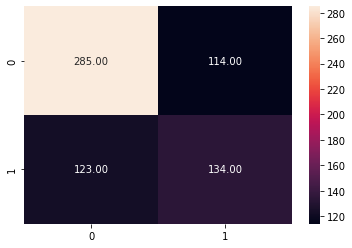

In [101]:
from sklearn.metrics import classification_report, confusion_matrix

samp = SMOTE()
X = df_norm[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity']]
#X = df_norm.drop('Potability',axis=1)
y = df_norm['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 
X_train, y_train =samp.fit_resample(X_train,y_train)
model = KNeighborsClassifier(metric='euclidean', n_neighbors=1)
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

In [ ]:
# Logistic regression

              precision    recall  f1-score   support

           0       0.62      0.54      0.58       399
           1       0.40      0.48      0.44       257

    accuracy                           0.52       656
   macro avg       0.51      0.51      0.51       656
weighted avg       0.53      0.52      0.52       656



<AxesSubplot:>

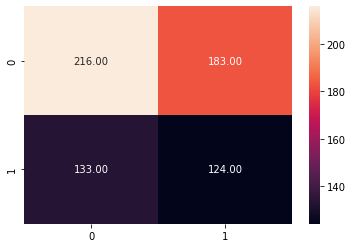

In [88]:
samp = SMOTE()
X = df_norm[['Hardness', 'Organic_carbon', 'Turbidity']]
y = df_norm['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 
X_train, y_train =samp.fit_resample(X_train,y_train)
model = LogisticRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

In [ ]:
# Decision tree

              precision    recall  f1-score   support

           0       0.70      0.71      0.71       399
           1       0.54      0.53      0.54       257

    accuracy                           0.64       656
   macro avg       0.62      0.62      0.62       656
weighted avg       0.64      0.64      0.64       656



<AxesSubplot:>

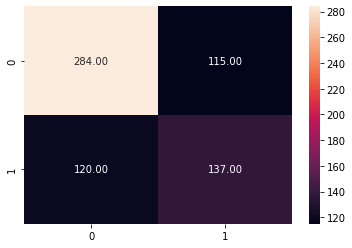

In [90]:
samp = SMOTE()
X = df_norm[['ph', 'Hardness', 'Solids', 'Sulfate', 'Turbidity']]
y = df_norm['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 
X_train, y_train =samp.fit_resample(X_train,y_train)
model = RandomForestClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

In [ ]:
# Random forest

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       399
           1       0.51      0.51      0.51       257

    accuracy                           0.61       656
   macro avg       0.60      0.60      0.60       656
weighted avg       0.61      0.61      0.61       656



<AxesSubplot:>

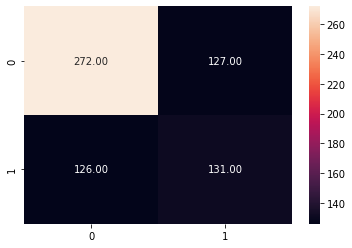

In [108]:
samp = SMOTE()
X = df_norm[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Organic_carbon', 'Trihalomethanes']]
y = df_norm['Potability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5) 
X_train, y_train =samp.fit_resample(X_train,y_train)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='.2f')

# 9) Conclusion